<p><h1>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;PUC MINAS - Pontifícia Universidade Católica de Minas Gerais</h1></p>

<p><h2>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pós Graduação em Inteligência Artificial E Aprendizado de Máquina</h2></p>

<p><h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Trabalho de Conclusão de Curso</h3></p>

<h4>Título: Análise de Séries Temporais sobre a Ação do Bitcoin</h4>

<h4>Aluno: Renan Nunes Bittencourt</h4>

<h7>Venho através deste trabalho apresentar os modelos preditivos utilizados na análise da regressão de uma série temporal na ação do Bitcoin. Este notebook visa a predição dos valores de fechamento diário das ações durante um período de 30 dias.Neste trabalho foi utilizado o Dataset do Kaggle de “Analyzing and Predicting Bitcoin pricing trend” onde pode ser adquirido através deste link (<a href="https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing">Clique Aqui</a>).</h7>

#### Importações das Bibliotecas

In [1]:
# Manipulação dos Dados
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Testes 
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller

# Salvando dados
import pickle

In [2]:
# Carregamento dos dados
df = pd.read_csv('BTC-USD.csv', delimiter=',', parse_dates=['Date'], index_col='Date')

In [3]:
# Estrutura do dados
df.shape

(2788, 6)

Podemos perceber acima que o conjunto de dados possui 2788 linhas e 6 colunas

<p><h3>Sobre o Dataset:</h3></p>

Temos a descrição das 6 colunas do dataset abaixo:

<ul>
  <li>Data (Date): Data de abertura e fechamento do pregão (Formato ano-mês-dia)</li>
  <li>Abertura (Open): Valor de abertura da ação no dia</li>
  <li>Alta (High): Máxima de valor que a ação conseguiu no dia</li>
  <li>Baixa (Low): Mínima de valor que a ação conseguiu no dia</li>
  <li>Fechamento (Close): Valor de fechamento da ação no dia</li>
  <li>Fechamento Ajustado (Adj Close): Valor de fechamento geral no dia</li>
  <li>Volume (Volume): Quantidade de ativos negociados no dia</li>
</ul>


#### Tratamento dos Dados

In [4]:
# Informações do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2788 entries, 2014-09-17 to 2022-05-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2788 non-null   float64
 1   High       2788 non-null   float64
 2   Low        2788 non-null   float64
 3   Close      2788 non-null   float64
 4   Adj Close  2788 non-null   float64
 5   Volume     2788 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 152.5 KB


Nas informações acima, podemos analisar que não possuímos dados nulos, que o nosso range de indexação da data vai de 17/09/2014 até 05/05/2022 e que possuímos dois tipos de dados no nosso Data Frame onde as colunas de Abertura (Open), Alta (High), Baixa (Low), Fechamento (Close) e Fechamento Ajustado (Adj Close) possuem dados em caráter quantitativo continuo enquanto a coluna Volume possui caráter quantitativo discreto.

In [5]:
# Procurando dados duplicados
df.duplicated().sum()

0

In [6]:
# Filtrando dados sujos
df[df['Volume'] == 0].sum()

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

Aqui estamos verificando se possui algum registro onde no dia do pregão não houve nenhuma negociação desta ação, isso indicaria que não haveria nenhum valor para os outros indicadores.

In [7]:
# Dados únicos
df.index.is_unique

True

Acima podemos ver que não temos datas duplicadas em nossa indexação

#### Entendimento dos Dados

In [8]:
# Análise descritiva dos dados
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [9]:
# Análise descritiva dos dados
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-01,37713.265625,38627.859375,37585.789063,38469.093750,38469.093750,27002760110
2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490
2022-05-05,39727.386719,39788.441406,39444.644531,39568.812500,39568.812500,34693083136


Estamos vendo acima, que tanto no início e no final possuímos o mesmo número de casas decimais para todas as cinco primeiras colunas, podemos ver também que as datas na indexação possuem uma sequência, e não estão misturados.

In [10]:
# Análise estatística dos dados
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381435,16615.381435,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040039,11388.611572,10722.320557,11056.325195,11056.325195,2.558002e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Podemos perceber que a média (mean) e a mediana (50%) possuem uma diferença bem grande, indicando que os dados não tem uma distribuição normal. os valores máximos e minimos possuem uma diferença grande, mostrando que será necessário uma normalização ou padronização para uma melhor aprendizagem do algoritmo ou rede neural. Também podemos ver o índice de risco que mostra a volatilidade das ações em relação a nossa coluna alvo de Fechamento (Close), este índice é representado pelo desvio padrão (std), neste caso podemos ver uma pequena variação.

In [11]:
# Gráfico de linha do tempo  do OHLC e Adj Close
fig = express.line(df, y=['Open','High','Low','Close','Adj Close'])
fig.update_xaxes(tickangle=45)
fig.show()

Podemos perceber no gráfico acima, que os dados ao longo do tempo possuem um comportamento quase que igual em uma visão anual, isso mostra que a nível de dias que será possível ver algum comportamento diferente dos atributos.Notamos também que a escala de variação dos valores das ações está em milhões.

In [12]:
# Gráfico de Linha do tempo do atributo Volume
fig = express.line(df, y=['Volume'])
fig.update_xaxes(tickangle=45)
fig.show()

Podemos ver que a escala de valores está em bilhões e que teve seu pico em 03/2021, isso mostra que foi exatamente nesta época que os outros índices tiveram seus maiores aumentos. O índice do volume mostra a quantidade de ações que foram comercializadas naquele mês, podemos dizer que devido ao plano de estímulos americanos, onde pequenos investidores poderiam comprar frações do Bitcoin houve uma antecipação de suas negociações.

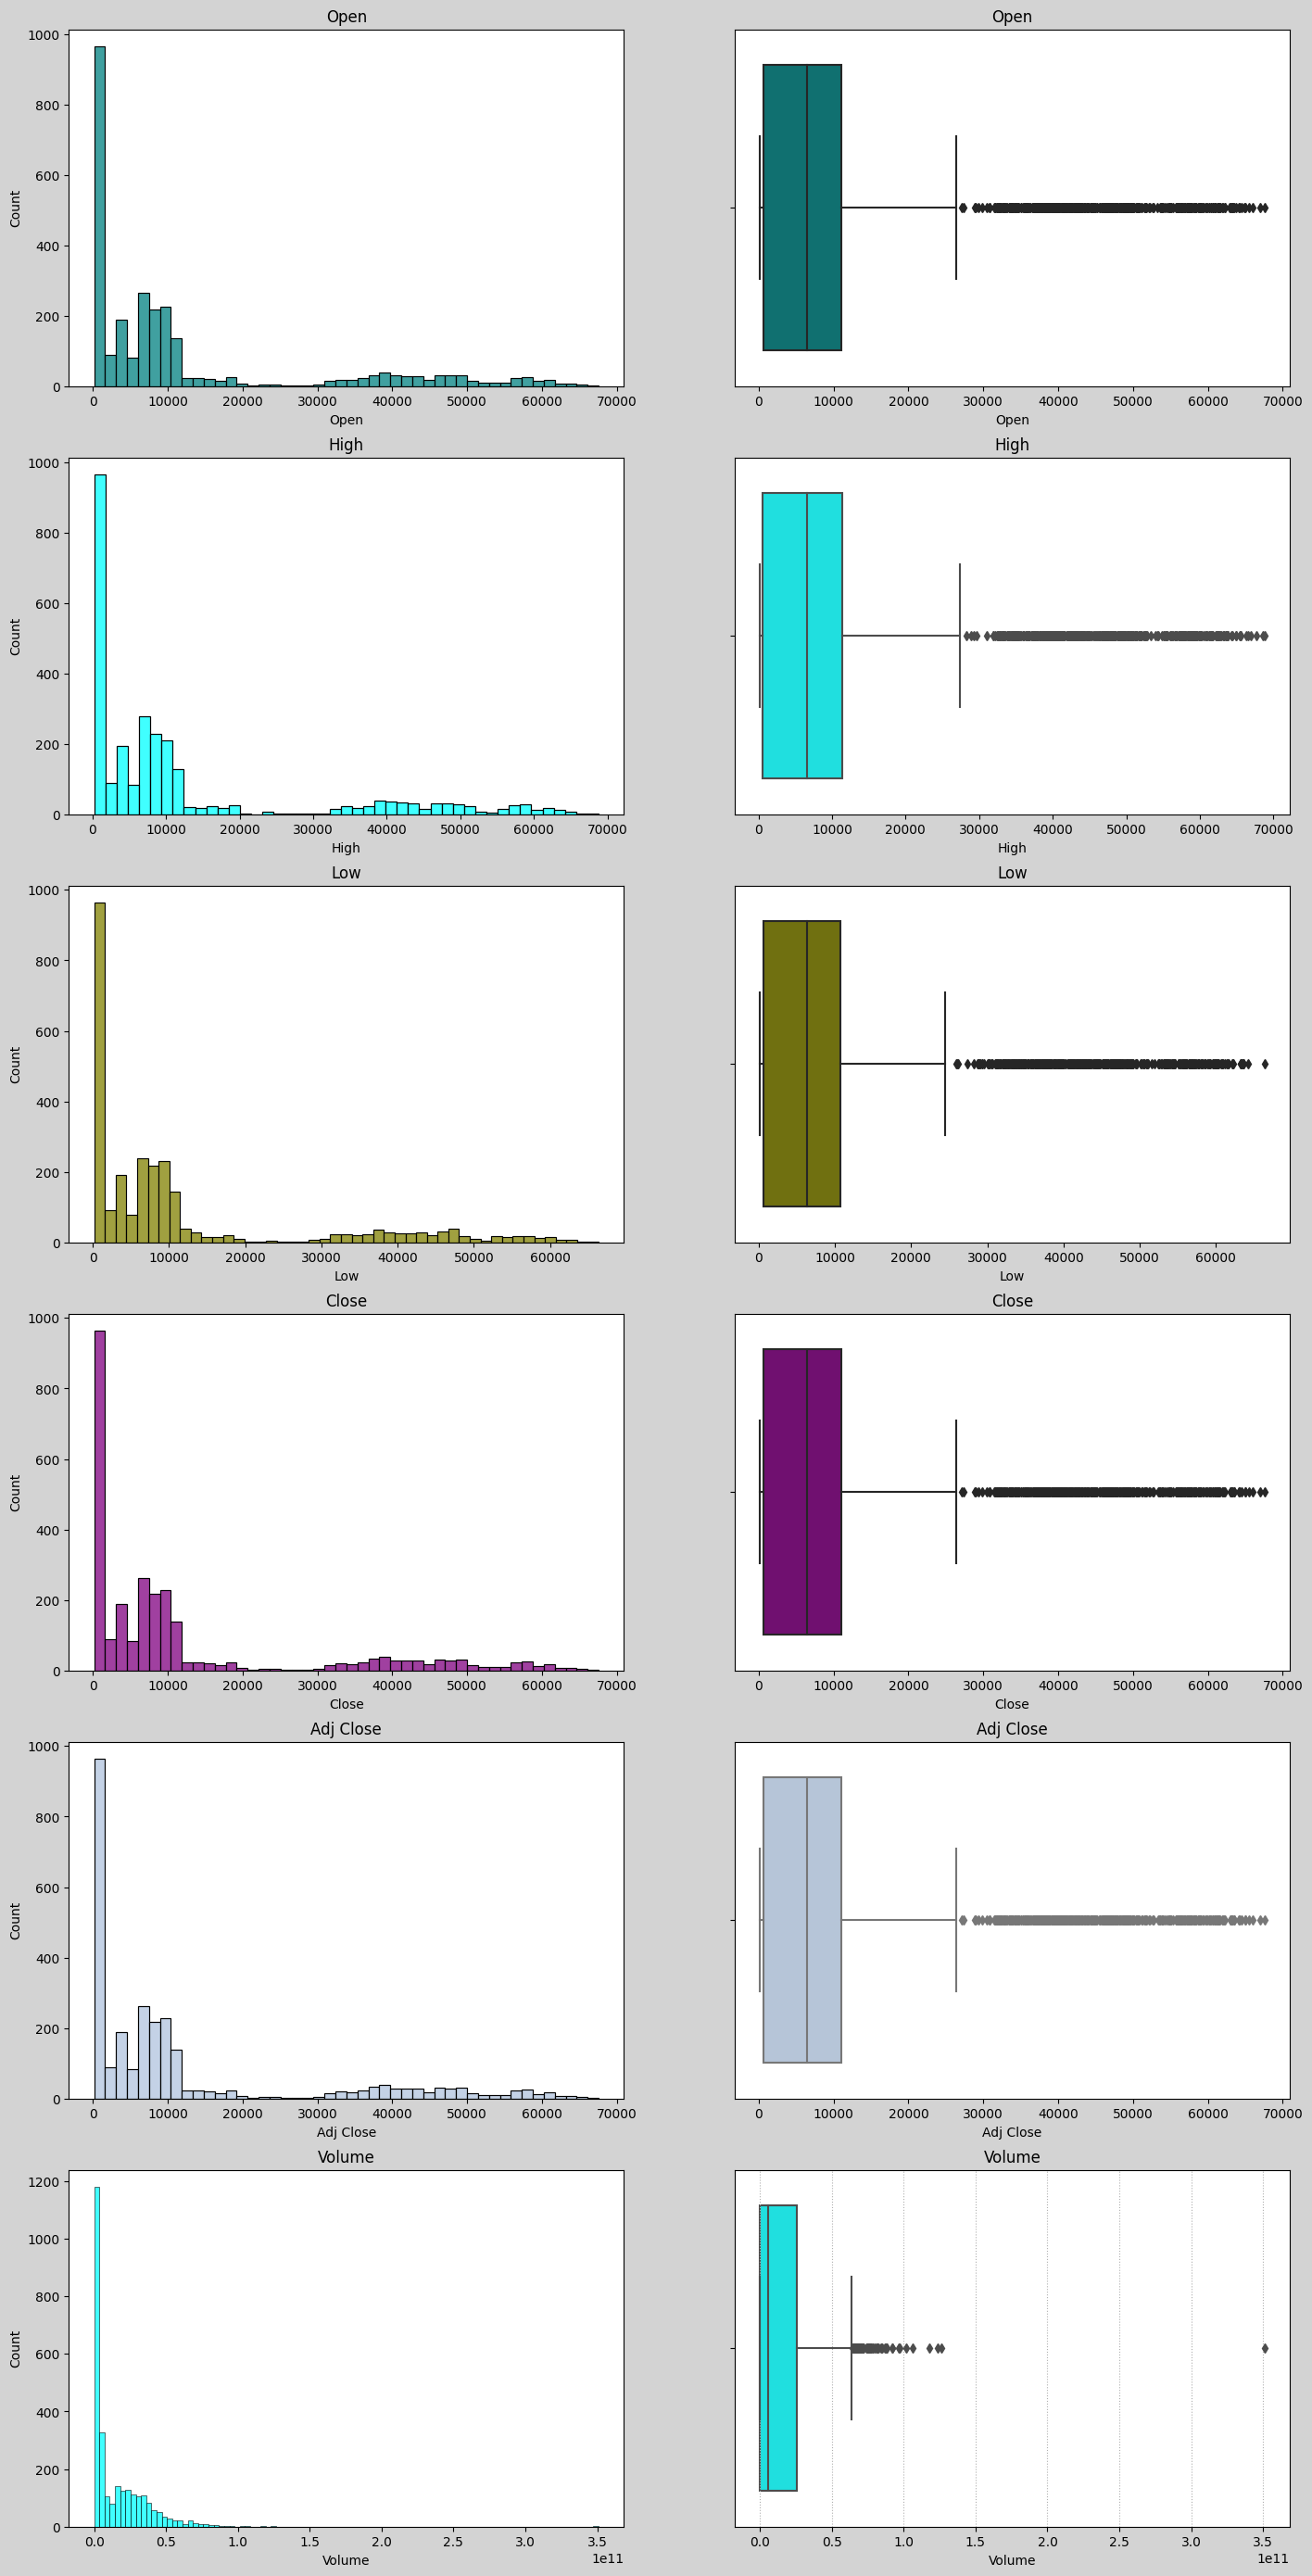

In [13]:
# Plot de distribuição dos dados
fig, axes = plt.subplots(6, 2, facecolor='lightgrey', figsize=(17,35))
plt.grid(linestyle=':')
sns.histplot(ax=axes[0, 0], data=df, x='Open', color='teal')
axes[0,0].set_title('Open')
sns.boxplot(ax=axes[0, 1], data=df, x='Open', color='teal')
axes[0,1].set_title('Open')
sns.histplot(ax=axes[1, 0], data=df, x='High', color='aqua')
axes[1,0].set_title('High')
sns.boxplot(ax=axes[1, 1], data=df, x='High', color='aqua')
axes[1,1].set_title('High')
sns.histplot(ax=axes[2, 0], data=df, x='Low', color='olive')
axes[2,0].set_title('Low')
sns.boxplot(ax=axes[2, 1], data=df, x='Low', color='olive')
axes[2,1].set_title('Low')
sns.histplot(ax=axes[3, 0], data=df, x='Close', color='purple')
axes[3,0].set_title('Close')
sns.boxplot(ax=axes[3, 1], data=df, x='Close', color='purple')
axes[3,1].set_title('Close')
sns.histplot(ax=axes[4, 0], data=df, x='Adj Close', color='lightsteelblue')
axes[4,0].set_title('Adj Close')
sns.boxplot(ax=axes[4, 1], data=df, x='Adj Close', color='lightsteelblue')
axes[4,1].set_title('Adj Close')
sns.histplot(ax=axes[5, 0], data=df, x='Volume', color='cyan')
axes[5,0].set_title('Volume')
sns.boxplot(ax=axes[5, 1], data=df, x='Volume', color='cyan')
axes[5,1].set_title('Volume');

Podemos perceber nas distribuições acima a esquerda, que em nenhum deles temos uma distribuição gaussiana, e que as distribuições de abertura até o preço de fechamento ajustado estão em escala diferente da distribuição de volume, já que o tipo de dado é diferente. Temos uma cauda alongada, representando a presença de valores esparsos. Sendo que em todas temos uma concentração próximos aos valores mínimos.

Já nos gráficos de boxplot, temos a certeza de valores esparsos. Mas como estamos trabalhando com valores que variam muito de preço e tendo grande influência do período inicial da nossa base de dados, onde que nos anos de 2014 até 2017 temos pouca ou quase nenhuma comercialização deste ativo, não podemos considerar estes valores como anomalias.

In [14]:
# Teste de Shapiro Wilk
print('Teste Shapiro Wilk')
print('')
[print(f'{c} p-value: {stats.shapiro(df[c])[1]:.5f}') for c in df.columns];

Teste Shapiro Wilk

Open p-value: 0.00000
High p-value: 0.00000
Low p-value: 0.00000
Close p-value: 0.00000
Adj Close p-value: 0.00000
Volume p-value: 0.00000


Vemos nos teste de Shapiro Wilk que as distribuições não são normais pois todas ficaram abaixo de 0.05

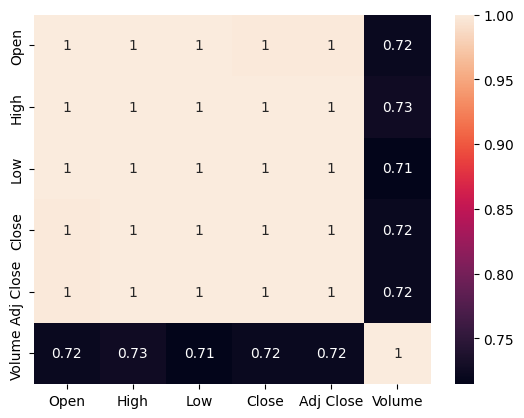

In [15]:
# Plot de correlação
sns.heatmap(df.corr(), annot=True);

Então temos em valores númericos as correlações estão apresentando uma correlação total entre as colunas de Abertutra, Alta, Baixa, Fechamento e Fechamento Ajustado, onde isso indica que quando há um aumento em um destes atributos as outras colunas são influenciadas a ter um movimento de crescimento também. Já no atributo de Volume mesmo não possuindo uma correlção total com os outros atributos ela possui uma correlação acima 0.7, o que indica uma correlação forte. 

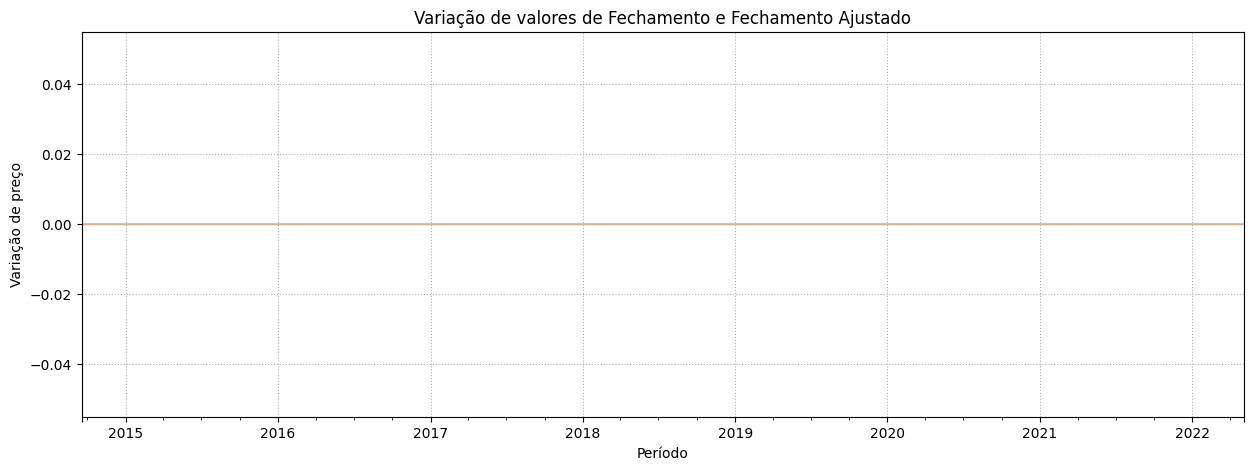

In [16]:
# Gráfico de variação do preço de fechamento (Close) e do preço de fechamento ajustado (Adj Close)

# Variável
variacao = (df['Close'] - df['Adj Close'])

#Gráfico
plt.figure(figsize=(15,5))
variacao.plot(label='Variação de Preço', color='tan')
plt.ylabel('Variação de preço')
plt.xlabel('Período')
plt.title('Variação de valores de Fechamento e Fechamento Ajustado')
plt.grid(linestyle=':')
plt.savefig('histogramBoxplot.png');

Podemos comprovar que não há nehuma variação de valores entre o preço de fechamento e o preço ajustado de fechamento, significando que não houve nenhuma comercialização deste ativo fora do horário do pregão.

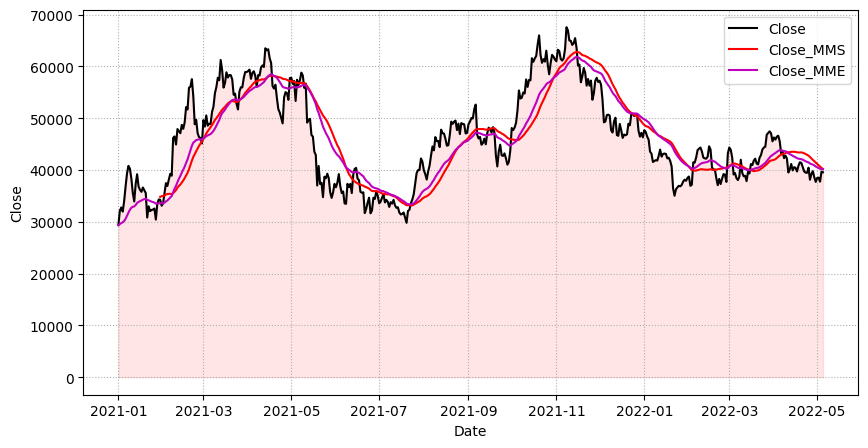

In [17]:
# Gráfico de médias móveis

# Variáveis
btc = df.loc['2021-01':'2022-05']
Close = btc['Close']
Close_MMS = Close.rolling(30).mean()
Close_MME = Close.ewm(span = 30, adjust=False).mean()

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(Close, 'k-', label='Close')
plt.plot(Close_MMS, 'r-', label='Close_MMS')
plt.plot(Close_MME, 'm-', label='Close_MME')
plt.ylabel('Close')
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(Close.index, 0, Close, color='r', alpha=0.1)
plt.legend(loc='upper right')
plt.show();

Nas médias móveis podemos identificar melhor as tendências dos valores de fechamento. No gráfico as médias móveis trabalhadas são a exponencial e a simples, sendo que as duas possuem uma janela de 30 dias. Podemos perceber que em ambas as linhas acompanham bem os preços de fechamento.

Na linha de média móvel simples (MMS) podemos perceber a tendência de um período, se esta linha estiver em uma trajetória de subida podemos perceber um período de compra dos ativos.

Já a linha de média móvel exponencial (MME) sofre mais com pequenas oscilações dentro da janela, nela podemos confirmar se realmente temos uma tendência de subida ou apenas uma grande suavização das variações de mercado.

No caso de investimentos, quando a média móvel exponencial, que é mais sensível a oscilações, cruza e média móvel simples pode significar uma possível tendência de queda das ações, sendo o que era considerado uma constante, agora deve receber uma atenção.

In [18]:
# Tabela de Risco a cada 30 dias para Fechamento
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Risk'] = df['Close'].rolling(window=30).std()
pd.pivot_table(df,index='Month',columns='Year',values='Risk',aggfunc=np.mean).describe()

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,3.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,5.000000
mean,23.050552,18.991217,25.162694,512.910976,787.822846,553.490261,766.067048,4054.337341,2593.311999
std,3.176676,11.443365,17.148593,802.885001,521.353217,308.968162,472.186935,1254.090967,387.503911
min,19.382446,6.706435,7.100368,66.049418,138.394263,123.657671,235.335807,2009.151387,2044.676261
25%,22.131183,10.866353,13.576542,89.319860,441.641439,368.565537,485.992327,2901.511873,2343.764743
50%,24.879920,15.281322,21.045470,248.284903,656.841300,566.842342,585.212097,4234.898007,2758.770881
75%,24.884605,22.687852,31.512334,515.293645,935.111315,748.772658,878.963515,5100.316485,2839.618448
max,24.889290,39.986770,71.332769,2961.750461,1813.126953,1159.335914,1734.084989,5578.405326,2979.729661


Nesta tabela, podemos analisar estatisticamente o índice de média do risco mensal, nele podemos perceber quanto o ativo no fechamento desta carteira pode trazer em volatilidade. Fica claro a diferença do risco entre o ano de 2022, ano onde sua popularidade havia aumentado, e o ano 2014 onde este ativo era pouco conhecido, a diferença entre os valores mínimos e máximos de cada ano e sua média anual, quanto maior sua popularidade mais ações são comercializadas e maior é o risco.

In [19]:
# Tabela de Retorno Diário para Fechamento
df['Return'] = df.Close.pct_change()
pd.pivot_table(df,index='Month',columns='Year',values='Return',aggfunc=np.mean).describe()

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,4.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,5.000000
mean,-0.004090,0.001531,0.002555,0.008581,-0.002679,0.002427,0.004548,0.002212,0.001143
std,0.006685,0.005535,0.004387,0.007053,0.007116,0.006583,0.006310,0.007396,0.006881
min,-0.011880,-0.009667,-0.004079,-0.001940,-0.013826,-0.006184,-0.004793,-0.012320,-0.005950
25%,-0.006785,-0.000783,-0.001656,0.003045,-0.006876,-0.001576,-0.001218,-0.001767,-0.005573
50%,-0.004448,0.001894,0.002391,0.007507,-0.002305,0.000580,0.005291,0.002255,0.002223
75%,-0.001753,0.005169,0.005866,0.014642,-0.000226,0.005474,0.009285,0.006842,0.005077
max,0.004414,0.009439,0.009034,0.018058,0.010407,0.016343,0.013217,0.012422,0.009937


Do mesmo jeito que na tabela acima, podemos analisar visualmente as estatísticas da média mensal de retorno. O retorno trata-se do lucro que será adquirido com este ativo, ou seja, quanto maior a demanda de procura deste ativo maior será o lucro no fechamento deste ativo. Podemos perceber que não houve um aumento no retorno deste ativo ao lingo dos anos.

<Figure size 3000x2000 with 0 Axes>

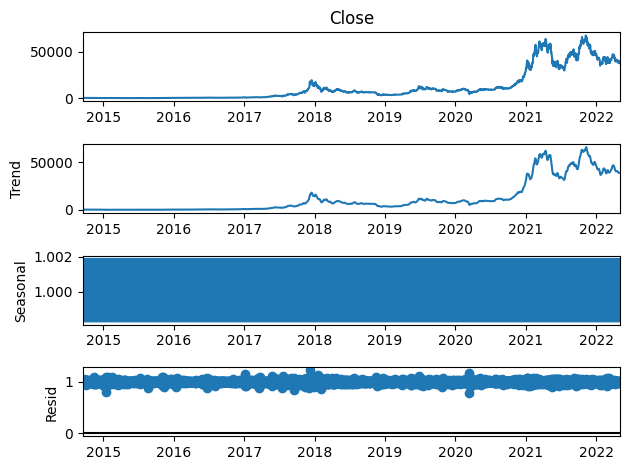

In [20]:
plt.figure(figsize=(30, 20))
decomp = seasonal_decompose(df['Close'], model='mutiplicative')
decomp.plot()
plt.show();

Conseguimos ver acima, que nosso atributo alvo possui uma tendência de crescimento a partir de 2018, tendo uma leve queda nos anos de 2019 e 2020 e voltando a crescer exponencialmente no ano de 2021. Neste gráfico podemos perceber a não presença de um ciclo.

Podemos perceber, que o atributo de Fechamento não possui uma sazonalidade bem definida, ou seja, não possui padrões de comportamento em um período curto e tempo.

Constatamos que os valores residuais ficam mais bem definidos quando escolhemos o modelo multiplicativo, neste modelo conseguimos extrair mais eficientemente sua sazonalidade deixando-o mais randômico. Também fica visivel que não possuimos dados com homocedasticidade e sim com heterocedasticidade.

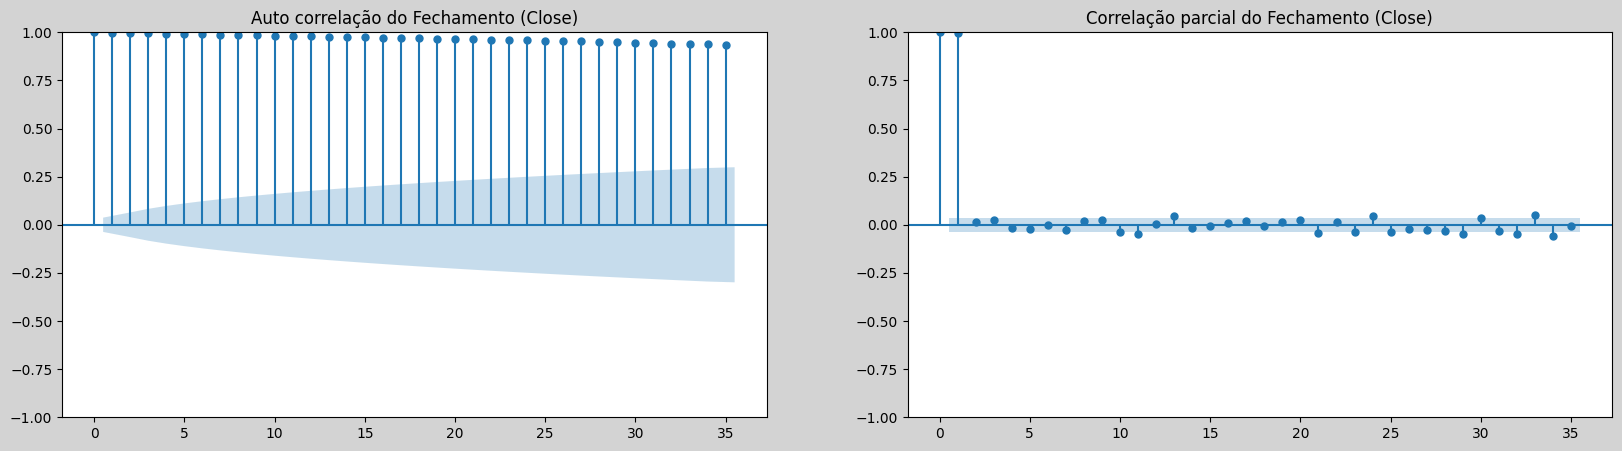

In [21]:
fig, axes = plt.subplots(1, 2, facecolor='lightgrey', figsize=(20,5))
plot_acf(df['Close'], ax=axes[0])
axes[0].set_title('Auto correlação do Fechamento (Close)')
plot_pacf(df['Close'], method='ywm', ax=axes[1])
axes[1].set_title('Correlação parcial do Fechamento (Close)')
plt.show();

Podemos perceber, que mesmo na faixa de 35 lags ficamos bem próximos da correlação perfeita, próximo de 1.00, e estando bem acima do nosso intervalo de confiança de 95%.

Já no gráfico de auto correlação parcial, temos uma correlação forte até o primeiro lag. Temos também alguns outros que passam d o intervalo de confiança de 95% mas permanecem muito próximos, vamos optar em  trabalhar com somente os primeiros.

In [22]:
# Teste de ADF
estacionaria = adfuller(df['Close'])
print(f'P-value: {estacionaria[1]}')

P-value: 0.701374803825112


Verificamos com o teste de Dick Fuller que a série não é estacionaria pois o seu valor "P" é maior que 0.05

#### Salvando os Dados

In [23]:
with open ('BTC-USD_saved.pkl', mode = 'wb') as f:
    pickle.dump(df, f)